# Information sources

# Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as plt

# Functions

In [3]:
def graph_bar(kind, dataframe, column, title, legend, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
        
    elif kind == 'stacked':
         dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, stacked = True, 
                                    figsize = (15,10))

In [4]:
def sort_data(dataframe, column):
    
    return pd.DataFrame(dataframe[column].sort_values())

In [5]:
def clean_data():
    
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Valenciana' if x == 'Valenciana, Comunidad' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad de Madrid' if x == 'Madrid, Comunidad de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Región de de Murcia' if x == 'Murcia, Región de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Comunidad Foral de Navarra' if x == 'Navarra, Comunidad Foral de' else x)
    db1['autonomous_region'] = db1.autonomous_region.apply(lambda x: 'Principado de Asturias' if x == 'Asturias, Principado de' else x)
    
    
    db1['province'] = db1.province.apply(lambda x: 'Alicante' if x == 'Alicante/Alacant' else x)
    db1['province'] = db1.province.apply(lambda x: 'Castellón' if x == 'Castellón/Castelló' else x)
    db1['province'] = db1.province.apply(lambda x: 'Araba' if x == 'Araba/Álava' else x)
    
    db1['sex'] = db1.sex.apply(lambda x: 'UKNOWN' if x == 'NC' else x)
    
    db1['age_interval'] = db1.age_interval.apply(lambda x: 'UKNOWN' if x == 'NC' else x)

In [6]:
def cumulative(dataframe):
    
    cumu_num_infections = dataframe.num_infections.cumsum()
    cumu_num_hosp = dataframe.num_hosp.cumsum()
    cumu_num_uci = dataframe.num_uci.cumsum()
    cumu_num_dead = dataframe.num_dead.cumsum()

    cumulative = pd.DataFrame({'cumu_num_infections': cumu_num_infections, 'cumu_num_hosp': cumu_num_hosp, 
                               'cumu_num_uci': cumu_num_uci, 'cumu_num_dead': cumu_num_dead})
    dataframe = pd.concat([dataframe, cumulative], axis = 1)
    return dataframe

In [7]:
def overview(title):
    
    if title == 'evolution':
        plt.rcParams['figure.figsize']=(15, 15)
        fig, axs = plt.subplots(4)
        fig.suptitle('Pandemic evolution')
        axs[0].plot(bydate.date, bydate.num_infections)
        axs[0].set_title('Number of infections')
        axs[0].axvline('2020-03-01', color = 'r')
        axs[1].plot(bydate.date, bydate.num_hosp)
        axs[1].set_title('Number of hospitalisations')
        axs[1].axvline('2020-03-01', color = 'r')
        axs[2].plot(bydate.date, bydate.num_uci)
        axs[2].set_title('Number of Intensive Care Unit')
        axs[2].axvline('2020-03-01', color = 'r')
        axs[3].plot(bydate.date, bydate.num_dead)
        axs[3].set_title('Number of deaths')
        axs[3].axvline('2020-03-01', color = 'r');
    
    if title == 'Number of infections':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(bydate.date, bydate.num_infections)
        axs[0].set_title('Daily')
        axs[0].axvline('2020-03-01', color = 'r')
        axs[1].plot(bydate.date, bydate.cumu_num_infections)
        axs[1].set_title('Cumulative')
        axs[1].axvline('2020-03-01', color = 'r')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of hospitalisations':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(bydate.date, bydate.num_hosp)
        axs[0].set_title('Daily')
        axs[0].axvline('2020-03-01', color = 'r')
        axs[1].plot(bydate.date, bydate.cumu_num_hosp)
        axs[1].set_title('Cumulative')
        axs[1].axvline('2020-03-01', color = 'r')
        plt.rcParams['figure.figsize']=(15, 15);
    
    elif title == 'Number of Intensive Care Units':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(bydate.date, bydate.num_uci)
        axs[0].set_title('Daily')
        axs[0].axvline('2020-03-01', color = 'r')
        axs[1].plot(bydate.date, bydate.cumu_num_uci)
        axs[1].set_title('Cumulative')
        axs[1].axvline('2020-03-01', color = 'r')
        plt.rcParams['figure.figsize']=(15, 15);
        
    elif title == 'Number of deaths':
        fig, axs = plt.subplots(2)
        fig.suptitle(title)
        axs[0].plot(bydate.date, bydate.num_dead)
        axs[0].set_title('Daily')
        axs[0].axvline('2020-03-01', color = 'r')
        axs[1].plot(bydate.date, bydate.cumu_num_dead)
        axs[1].set_title('Cumulative')
        axs[1].axvline('2020-03-01', color = 'r')
        plt.rcParams['figure.figsize']=(15, 15);

In [8]:
def graph_bar(kind, dataframe, column, title, color):
    
    if kind == 'vertical':
        
        dataframe[column].plot.barh(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();
    
    elif kind == 'horizontal':
        dataframe[column].plot.bar(title = title, grid = 1, yticks = [i for i in range(0,int(dataframe[column].max()),5)], 
                                   rot=0, fontsize = 13, color = color, figsize = (15,10))
        plt.show();

In [9]:
def freq_rel(dataframe):
    
    dataframe['Number of infection (%)'] = [round(i/ dataframe['num_infections'].sum(),3)*100 for i in dataframe['num_infections']]
    dataframe['Number of hospitalisation (%)'] = [round(i/ dataframe['num_hosp'].sum(),3)*100 for i in dataframe['num_hosp']]
    dataframe['Number of Intensive Care Unit (%)'] = [round(i/ dataframe['num_uci'].sum(),3)*100 for i in dataframe['num_uci']]
    dataframe['Number of deaths (%)'] = [round(i/ dataframe['num_dead'].sum(),3)*100 for i in dataframe['num_dead']]

In [10]:
def severe_cases(dataframe):
    
     dataframe[['Number of hospitalisation (%)', 'Number of Intensive Care Unit (%)',
                    'Number of deaths (%)']].plot.bar(title = 'Severe Cases', grid = 1, 
                    yticks = [i for i in range(0,100,10)], 
                    rot=0, fontsize = 13, color = ['Darkblue', 'Orange', 'Darkred'], stacked = True, figsize = (15,10))

## Data Market:
https://datamarket.es/#covid-19-dataset

We'll first explore the different data sets one can find in different sources regarding the covid information for Spain

In [11]:
db1 =pd.read_csv('covid-19-sample.csv') 

In [12]:
db1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819000 entries, 0 to 818999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   date               819000 non-null  object
 1   autonomous_region  819000 non-null  object
 2   province           819000 non-null  object
 3   sex                819000 non-null  object
 4   age_interval       819000 non-null  object
 5   num_infections     819000 non-null  int64 
 6   num_hosp           819000 non-null  int64 
 7   num_uci            819000 non-null  int64 
 8   num_dead           819000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 56.2+ MB


## Data description

+ age_interval: Intervalo de años en el cual se ubica el grupo de análisis.
+ autonomous_region: Comunidad autónoma donde se registran los datos.
+ date: Fecha del momento en el cual se obtuvieron los datos.
+ num_dead: Número de muertes que se han producido en el grupo de análisis.
+ num_hosp: Número de hospitalizaciones que ha tenido el grupo de análisis.
+ num_infections: Número de infecciones que han se han reportado en el grupo de análisis.
+ num_uci: Número de ingresos en la Unidad de Cuidados Intensivos que ha tenido el grupo de análisis.
+ province: Provincia donde se registran los datos.
+ sex: Sexo del grupo de análisis (H, M, NC).


#### Data cleaning

In [13]:
clean_data()

In [14]:
db1['date'] = pd.to_datetime(db1.date)

In [15]:
db1.head()

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-01-01,Comunidad Valenciana,Alicante,H,0-9,0,0,0,0
1,2020-01-01,Comunidad Valenciana,Alicante,H,10-19,0,0,0,0
2,2020-01-01,Comunidad Valenciana,Alicante,H,20-29,0,0,0,0
3,2020-01-01,Comunidad Valenciana,Alicante,H,30-39,0,0,0,0
4,2020-01-01,Comunidad Valenciana,Alicante,H,40-49,0,0,0,0


In [16]:
db1.date.describe()

<ipython-input-16-975a9b978b7e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  db1.date.describe()


count                  819000
unique                    525
top       2021-03-07 00:00:00
freq                     1560
first     2020-01-01 00:00:00
last      2021-06-08 00:00:00
Name: date, dtype: object

#### I'm interested in data where the number of infections is greater than 0 (thus, at least 1): 

In [17]:
db1 = db1[(db1.num_infections > 0)].reset_index()
db1 = db1.drop(columns = ['index'], axis = 1)

In [18]:
db1.head()

,date,autonomous_region,province,sex,age_interval,num_infections,num_hosp,num_uci,num_dead
0,2020-03-02,Comunidad Valenciana,Alicante,H,60-69,1,1,0,0
1,2020-03-02,Comunidad Valenciana,Alicante,H,70-79,1,1,0,0
2,2020-03-02,Comunidad Valenciana,Alicante,M,30-39,1,0,0,0
3,2020-03-02,Comunidad Valenciana,Alicante,M,70-79,1,0,0,0
4,2020-03-02,Comunidad Valenciana,Alicante,M,80+,1,0,0,0


### autonomous_region:

In [19]:
db1.autonomous_region.unique()

array(['Comunidad Valenciana', 'Castilla-La Mancha', 'Andalucía',
       'Castilla y León', 'Catalunya', 'Extremadura', 'País Vasco',
       'Galicia', 'Ceuta', 'Canarias', 'Aragón', 'La Rioja',
       'Comunidad de Madrid', 'Melilla', 'Región de de Murcia',
       'Comunidad Foral de Navarra', 'Principado de Asturias',
       'Illes Balears', 'Cantabria'], dtype=object)

In [20]:
region = db1.groupby('autonomous_region').sum()

In [21]:
freq_rel(region)

In [22]:
region

,num_infections,num_hosp,num_uci,num_dead,Number of infection (%),Number of hospitalisation (%),Number of Intensive Care Unit (%),Number of deaths (%)
autonomous_region,,,,,,,,
Andalucía,591896,46152,5177,9276,16.0,13.1,15.6,12.3
Aragón,123897,12328,1175,3200,3.3,3.5,3.5,4.2
Canarias,56215,4873,1077,620,1.5,1.4,3.2,0.8
Cantabria,30549,3202,458,514,0.8,0.9,1.4,0.7
Castilla y León,225670,25507,2101,5884,6.1,7.2,6.3,7.8
Castilla-La Mancha,194224,18305,1359,5379,5.2,5.2,4.1,7.1
Catalunya,623260,40608,3463,14301,16.8,11.5,10.4,18.9
Ceuta,5946,286,33,60,0.2,0.1,0.1,0.1
Comunidad Foral de Navarra,62987,5744,555,1099,1.7,1.6,1.7,1.5


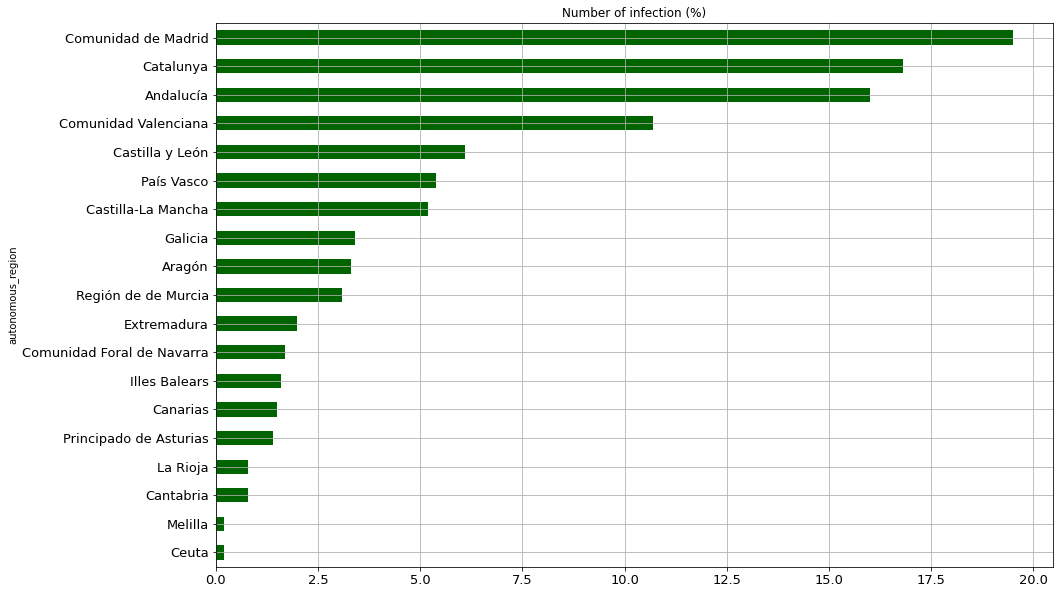

In [23]:
graph_bar('vertical', sort_data(region, 'Number of infection (%)'), 
          'Number of infection (%)', 'Number of infection (%)', 'Darkgreen')

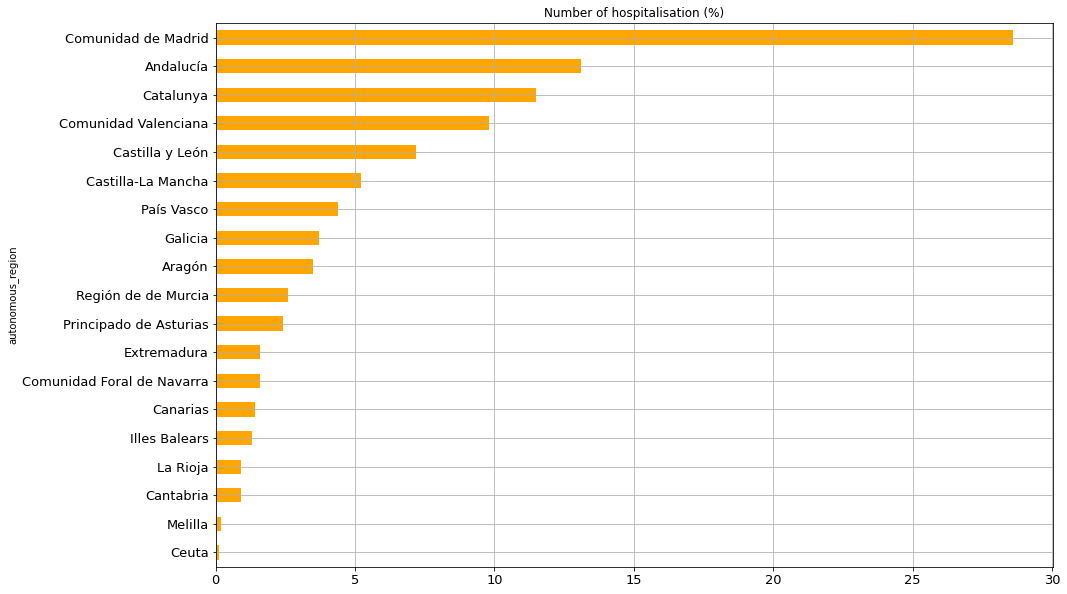

In [24]:
graph_bar('vertical', sort_data(region, 'Number of hospitalisation (%)'), 
          'Number of hospitalisation (%)', 'Number of hospitalisation (%)', 'Orange')

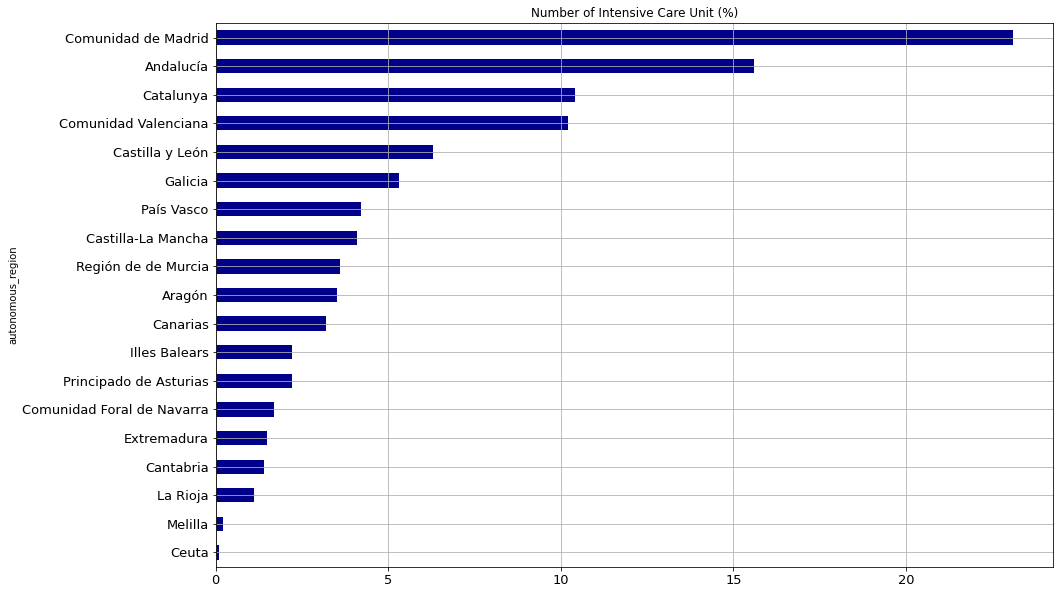

In [25]:
graph_bar('vertical', sort_data(region, 'Number of Intensive Care Unit (%)'), 
          'Number of Intensive Care Unit (%)', 'Number of Intensive Care Unit (%)', 'Darkblue')

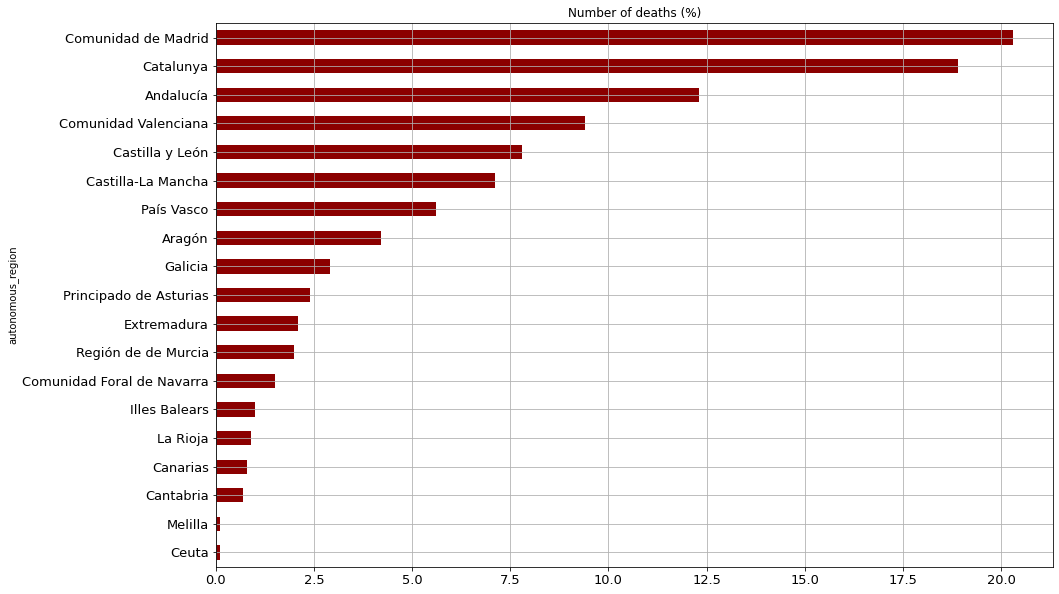

In [26]:
graph_bar('vertical', sort_data(region, 'Number of deaths (%)'), 
          'Number of deaths (%)', 'Number of deaths (%)', 'Darkred')

### province:

In [27]:
db1.province.unique()

array(['Alicante', 'Albacete', 'Almería', 'Ávila', 'Barcelona', 'Badajoz',
       'Bizkaia', 'Burgos', 'A Coruña', 'Cádiz', 'Cáceres', 'Ceuta',
       'Córdoba', 'Ciudad Real', 'Castellón', 'Cuenca', 'Las Palmas',
       'Girona', 'Granada', 'Guadalajara', 'Huelva', 'Huesca', 'Jaén',
       'Lleida', 'León', 'La Rioja', 'Lugo', 'Madrid', 'Málaga',
       'Melilla', 'Murcia', 'Navarra', 'Asturias', 'Ourense', 'Palencia',
       'Illes Balears', 'Pontevedra', 'Cantabria', 'Salamanca', 'Sevilla',
       'Segovia', 'Soria', 'Gipuzkoa', 'Tarragona', 'Teruel',
       'Santa Cruz de Tenerife', 'Toledo', 'Valencia/València',
       'Valladolid', 'Araba', 'Zaragoza', 'Zamora'], dtype=object)

### sex

In [28]:
db1.sex.value_counts()

M         150558
H         147767
UKNOWN      1358
Name: sex, dtype: int64

gender = db1.groupby('sex').sum().reset_index()

### age_interval

In [29]:
db1.age_interval.value_counts()

40-49     36851
50-59     36537
30-39     35665
20-29     34593
60-69     34020
10-19     30869
70-79     30602
80+       29768
0-9       28310
UKNOWN     2468
Name: age_interval, dtype: int64

## Pandemic Evolution

In [30]:
bydate = db1.groupby('date').sum().reset_index()

In [31]:
bydate = cumulative(bydate)

In [32]:
bydate.head()

,date,num_infections,num_hosp,num_uci,num_dead,cumu_num_infections,cumu_num_hosp,cumu_num_uci,cumu_num_dead
0,2020-01-18,1,1,0,0,1,1,0,0
1,2020-01-31,1,0,0,0,2,1,0,0
2,2020-02-09,1,1,0,0,3,2,0,0
3,2020-02-12,3,0,0,0,6,2,0,0
4,2020-02-21,1,0,0,0,7,2,0,0


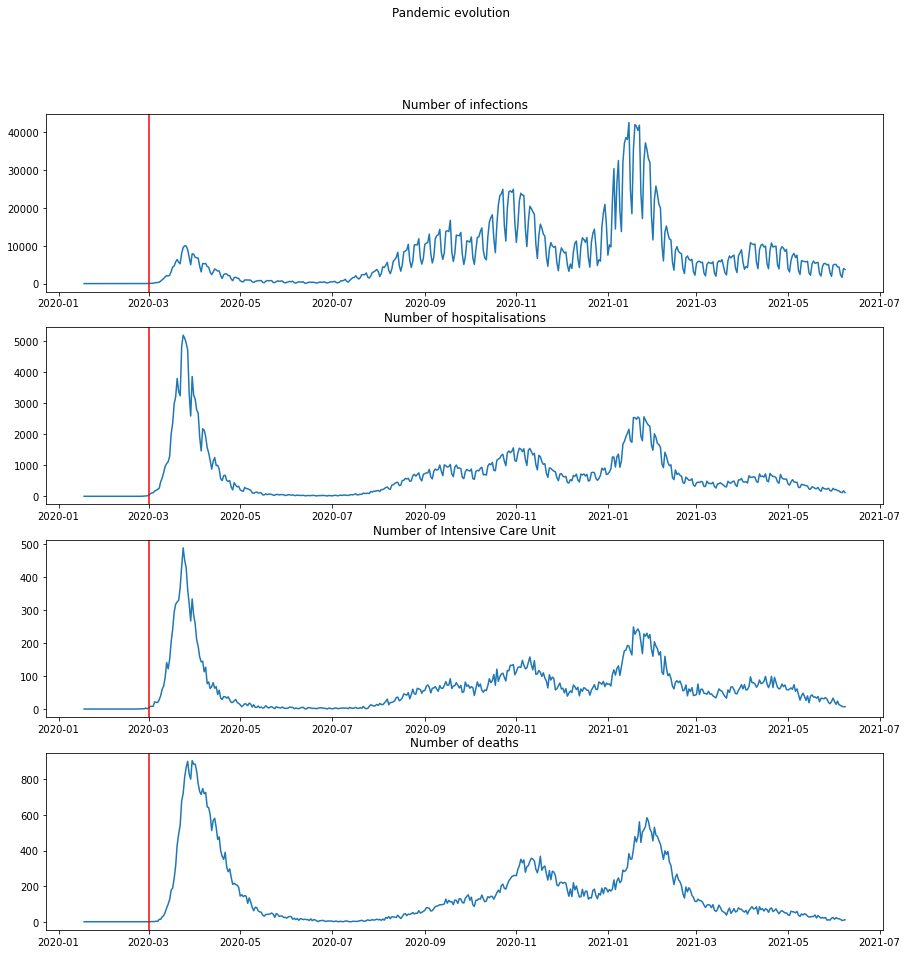

In [33]:
overview('evolution')

### Number of infections

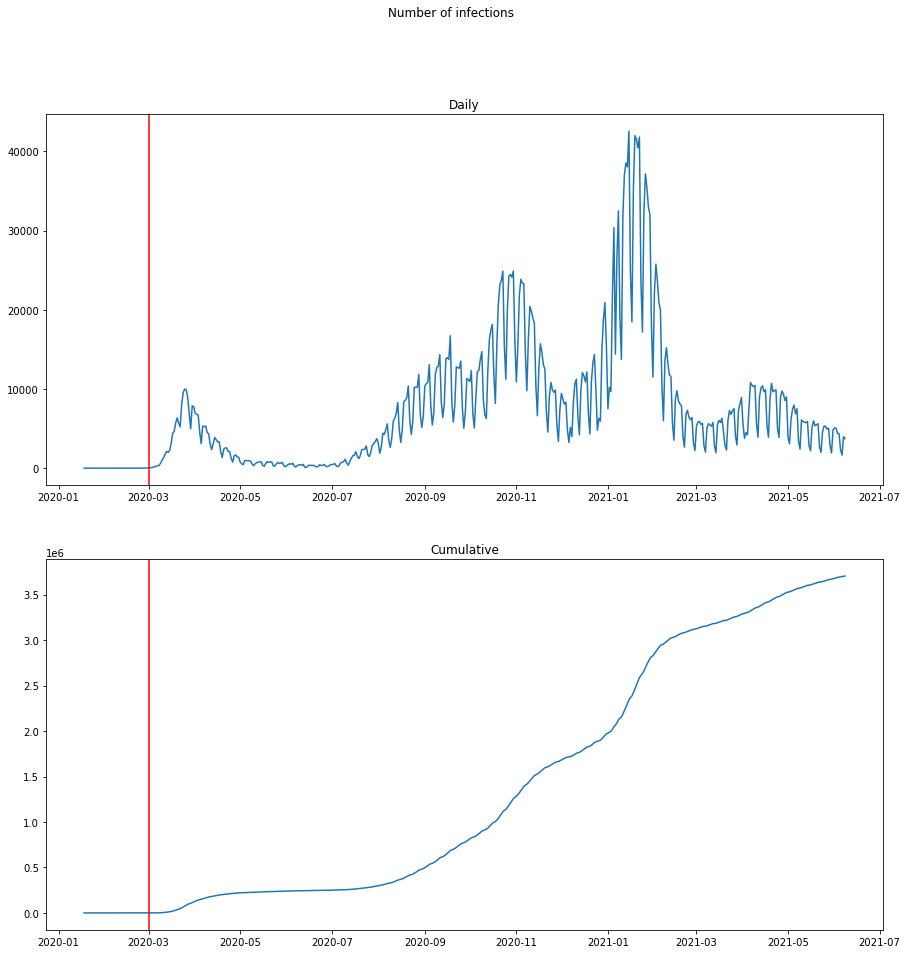

In [34]:
overview('Number of infections')

### Number of hospitalisations

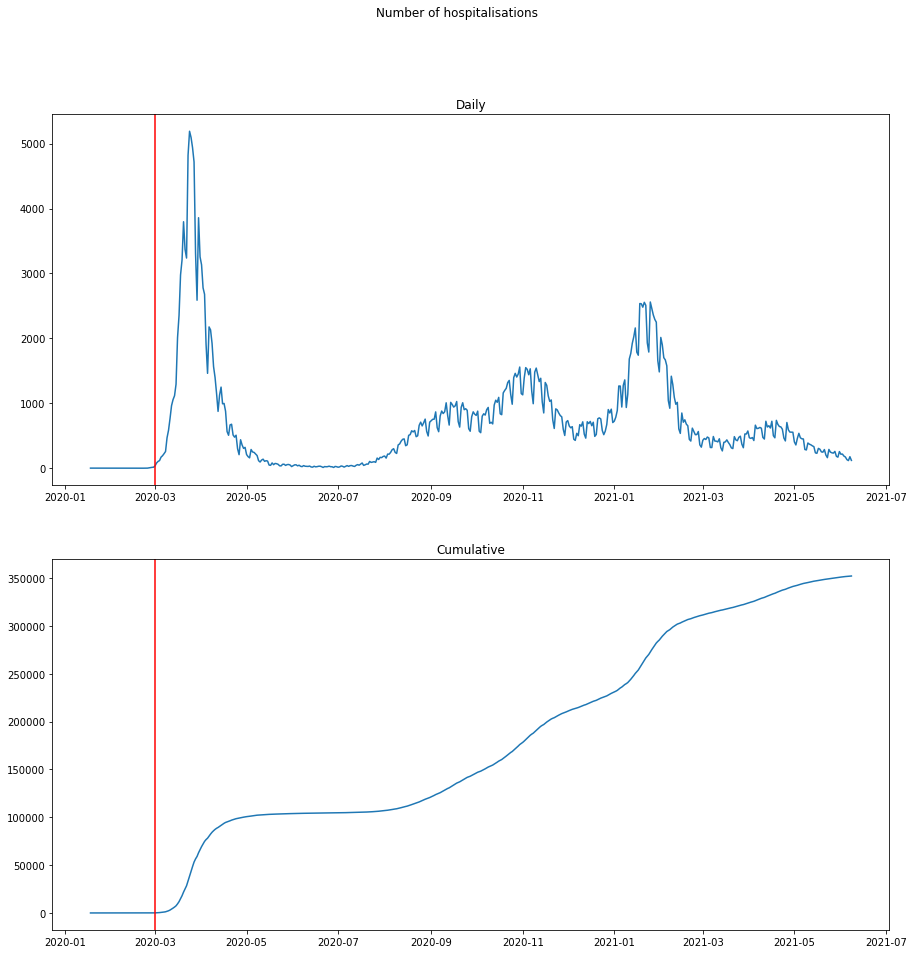

In [35]:
overview('Number of hospitalisations')

### Intensive Care Units

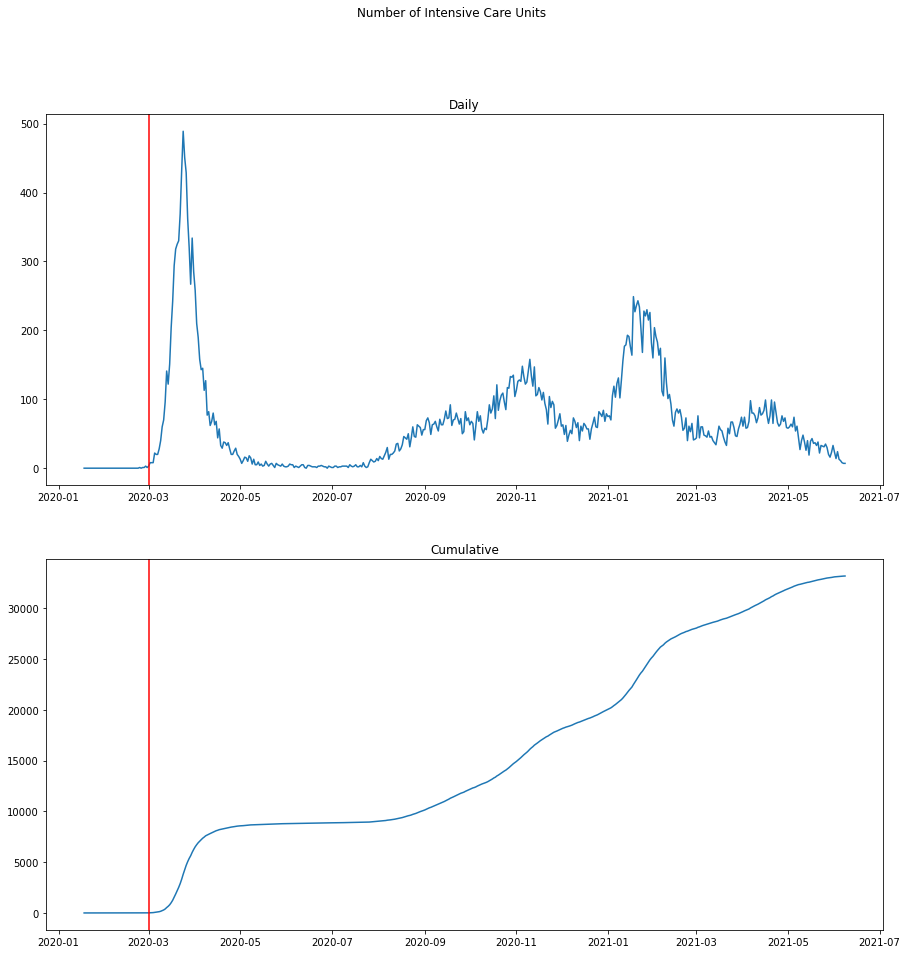

In [36]:
overview('Number of Intensive Care Units')

### Deaths

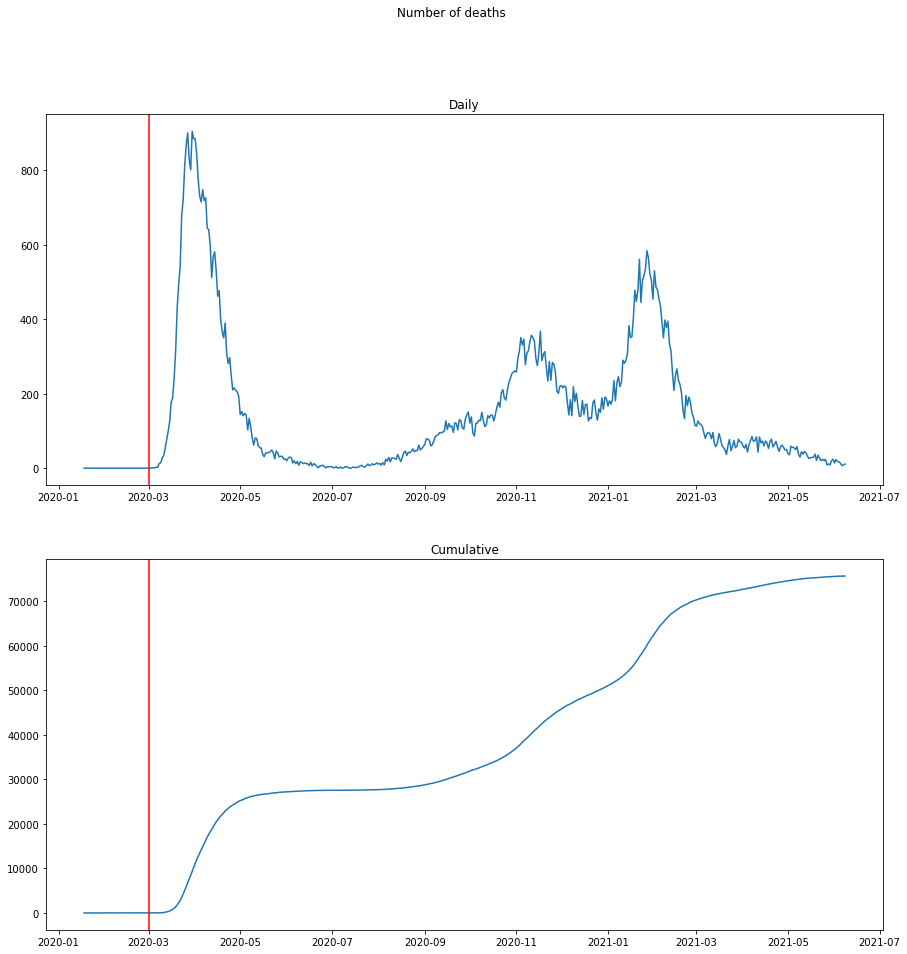

In [37]:
overview('Number of deaths')

## Age:

In [38]:
ages = db1.groupby('age_interval').sum()

#### UKNOWN age is not significative. Let's drop this to have a cleaner view

In [39]:
ages = ages.drop('UKNOWN', axis = 0)

In [40]:
freq_rel(ages)

In [41]:
ages

,num_infections,num_hosp,num_uci,num_dead,Number of infection (%),Number of hospitalisation (%),Number of Intensive Care Unit (%),Number of deaths (%)
age_interval,,,,,,,,
0-9,259374,2107,134,8,7.0,0.6,0.4,0.0
10-19,414273,2494,166,16,11.2,0.7,0.5,0.0
20-29,484599,8878,456,83,13.1,2.5,1.4,0.1
30-39,511105,18382,1235,209,13.8,5.2,3.7,0.3
40-49,629180,36821,3261,767,17.0,10.5,9.8,1.0
50-59,555323,56071,6950,2814,15.0,15.9,21.0,3.7
60-69,353593,63815,10426,7290,9.6,18.1,31.5,9.6
70-79,233833,69490,8871,16485,6.3,19.8,26.8,21.8
80+,252716,93545,1637,47889,6.8,26.6,4.9,63.4


### Number of infections

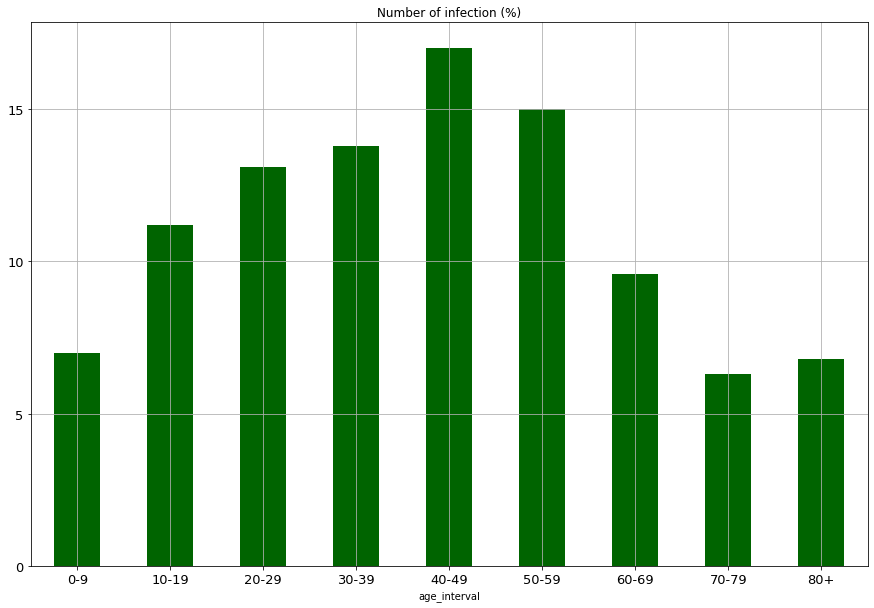

In [42]:
graph_bar('horizontal', ages, 'Number of infection (%)',
          'Number of infection (%)', 'Darkgreen')

### Number of hospitalisation

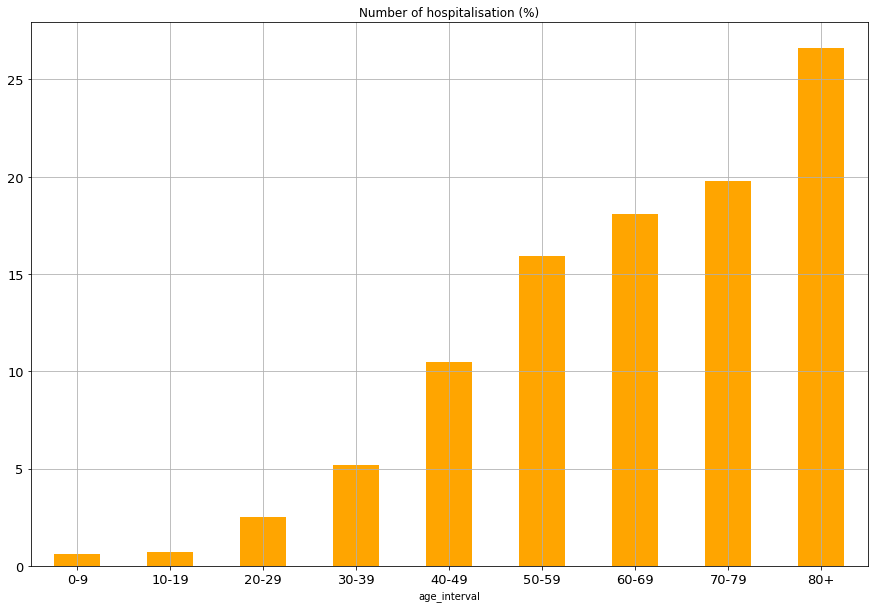

In [43]:
graph_bar('horizontal', ages, 'Number of hospitalisation (%)',
          'Number of hospitalisation (%)', 'Orange')

### Number of Intensive Care Unit

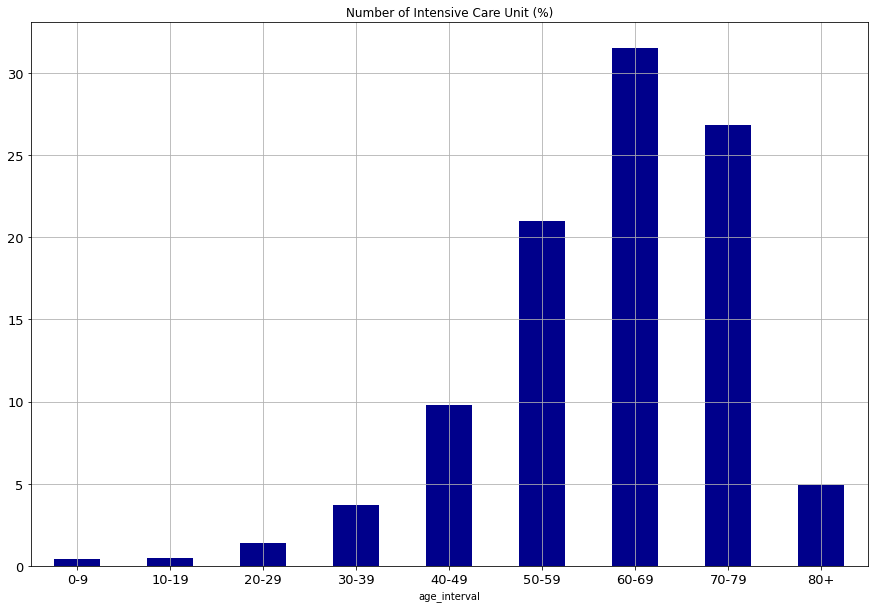

In [44]:
graph_bar('horizontal', ages, 'Number of Intensive Care Unit (%)',
          'Number of Intensive Care Unit (%)', 'Darkblue')

### Number of deaths

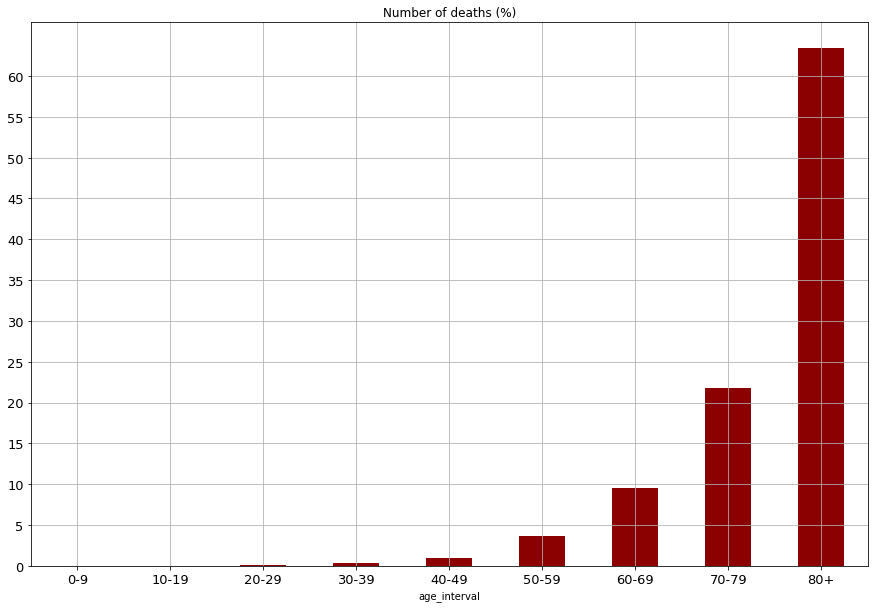

In [45]:
graph_bar('horizontal', ages, 'Number of deaths (%)',
          'Number of deaths (%)', 'Darkred')

### Severe cases

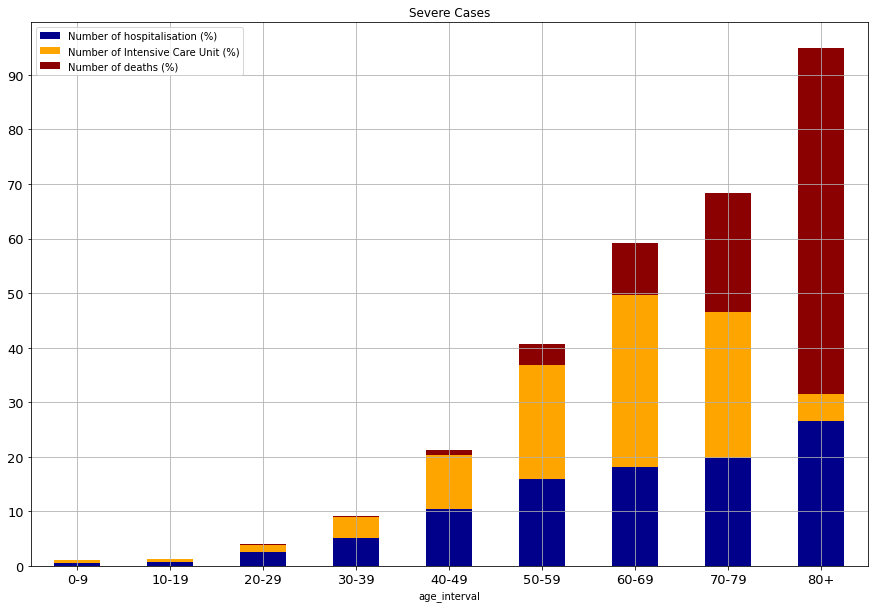

In [46]:
severe_cases(ages)